<a href="https://colab.research.google.com/github/chakravarthi-kudumula/AI-Driven-Business-Insights/blob/main/AI_Driven_Business_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-Driven Business Insights**

### **Key Insights and Their Impact**

**Profit Prediction:**

**Insight:** Predicting expected profit based on R&D Spend, Administration costs, Marketing Spend, and geographical factors (State).

**Impact:** Helps in efficient budget allocation and identifying high-return investment areas. By understanding the relationship between expenses and profit, you can make informed decisions on where to cut costs or invest more.

**Revenue Prediction:**

**Insight:** Forecasting monthly revenue using the number of customers, menu pricing, marketing spend, cuisine type, customer spending patterns, promotions, and reviews.

**Impact:** Enables optimization of pricing, marketing strategies, and promotions. This insight allows for better planning and execution to maximize revenue, helping you adjust strategies dynamically based on predicted revenue trends.

**Sales Forecasting:**

**Insight:** Predicting future sales based on historical sales data, holiday indicators, and economic factors such as temperature, fuel prices, CPI, and unemployment rates.

**Impact:** Assists in inventory management, staffing, and planning promotional events. Accurate sales forecasts ensure that you can meet demand without overstocking or understocking, thus reducing costs and improving customer satisfaction.

**Customer Churn Prediction:**

**Attributes:** RowNumber, CustomerId, Surname, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, Geography_Spain, Gender_Male

**Impact:** Enables targeted retention strategies. Identifying the factors leading to customer churn allows for personalized interventions to retain customers, thus increasing customer lifetime value.

**Pricing Optimization:**

**Attributes:** Product ID, Quantity, Total Price, Freight Price, Unit Price, Product Photos Quantity, Product Weight, Customers, Competitor Prices (comp_1, comp_2, comp_3)

**Impact:** Ensures competitive yet profitable pricing. Analyzing product attributes and competitor pricing helps in setting optimal prices that attract customers while maximizing profits.


# **Profit** **Prediction**

Import all the necessary Libraries

In [ ]:
#importing all the Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Loading and Preprocessing the Data

In [ ]:
profit_dataset = pd.read_csv('/content/profit.csv') # Loading the Dataset
X = profit_dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = profit_dataset['Profit']

In [ ]:
# Exclude non-numeric columns from the dataset
numeric_data = profit_dataset.select_dtypes(include=['float64', 'int64'])

Data Cleaning

Handling the Missing values




In [ ]:
profit_dataset.isnull().sum()
# No null values in the existing dataset but to generalize it

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#Deleting rows if there,s a null value in that row
profit_dataset.dropna(inplace = True)

In [ ]:
#Filling the missing values with the mean
numeric_data.fillna(numeric_data.mean(), inplace=True)

Exploratory Data Analysis (EDA)



In [ ]:
profit_dataset.shape

(1000, 5)

In [ ]:
profit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
profit_dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [ ]:
profit_dataset.describe()

Visual Analysis

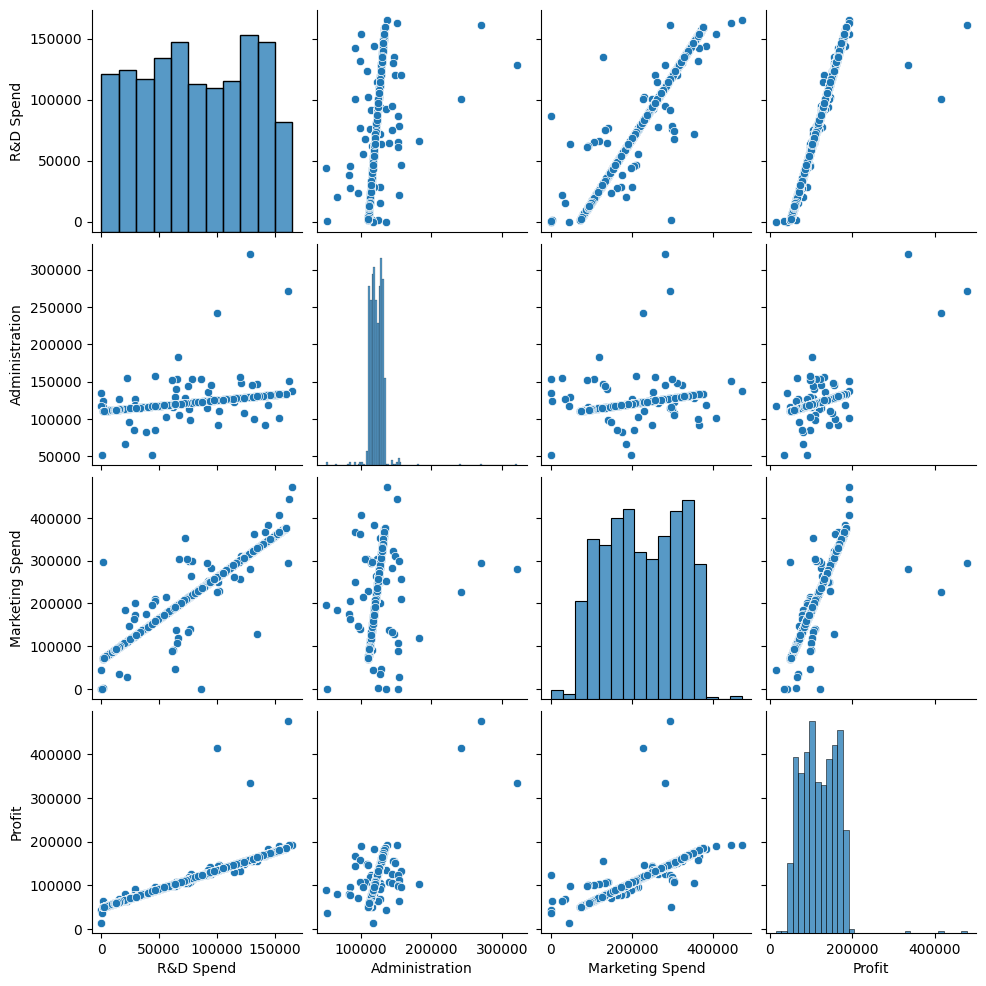

In [ ]:
sns.pairplot(profit_dataset) # Visualize distributions of numerical variables
plt.show()

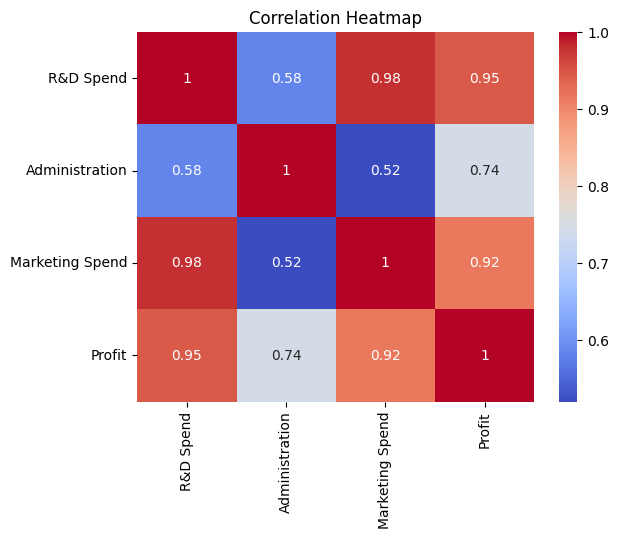

In [ ]:
# Visualize correlation heatmap
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Encoding categorical variables - State

In [ ]:
X['State'] = LabelEncoder().fit_transform(X['State'])


<ipython-input-39-395da5f9a2da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['State'] = LabelEncoder().fit_transform(X['State'])


Split the data into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using RandomForest algorithm to train the model


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model Performance Evaluation


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 20661674.907436386


Use the trained model for profit prediction

In [ ]:
#Replace the values with your own input data
new_data = pd.DataFrame({
    'R&D Spend': [int(input("Enter R&D Spent : "))],
    'Administration': [int(input("Enter Administration : "))],
    'Marketing Spend': [int(input("Enter Marketing Spent : "))],
    'State': [input("Enter State : ")]
})

Enter R&D Spent : 150000
Enter Administration : 120000
Enter Marketing Spent : 300000
Enter State : New York


Encoding categorical variable in new data

In [ ]:
new_data['State'] = LabelEncoder().fit_transform(new_data['State'])

Making a Predictive System

In [ ]:
predicted_profit = model.predict(new_data)
print('Predicted Profit:', predicted_profit)

Predicted Profit: [169343.422969]


**Strategic Actions to Maximize Business Growth Based on Predicted Profit**

***Budget Allocation:*** Reallocate budgets towards R&D and marketing efforts that yield higher returns.

***Cost Management:*** Identify and reduce administrative and other non-essential expenses.

***Investment Decisions:*** Focus on high-profit geographical areas and invest more in states with better returns.


# **Revenue Prediction**

Load and preprocess the dataset

In [ ]:
revenue_dataset = pd.read_csv('/content/Restaurant_revenue (1).csv')

Data Preprocessing

Data Cleaning

In [ ]:
#Handling Missing Values
revenue_dataset.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [ ]:
#Dropping all rows with null values
revenue_dataset.dropna(inplace = True)

Exploratory Data Analysis (EDA)

In [ ]:
revenue_dataset.shape

(1000, 8)

Extract features (X) and target (y)

In [ ]:
revenue_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [ ]:
revenue_dataset.head(10)

Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
0                   61   43.117635        12.663793     Japanese   
1                   24   40.020077         4.577892      Italian   
2                   81   41.981485         4.652911     Japanese   
3                   70   43.005307         4.416053      Italian   
4                   30   17.456199         3.475052      Italian   
5                   92   19.427670        13.114473     American   
6                   96   35.350343        16.960318     American   
7                   84   46.314645        14.486349      Italian   
8                   84   22.647863        15.841873     American   
9                   97   33.532267         8.095969      Italian   

   Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
0                  36.236133           0       45       350.912040  
1                  17.952562           0       36       221.319091  
2                  22.600420           1       91       326.529763  
3                  18.984098           1       59       348.190573  
4                  12.766143           1       30       185.009121  
5                  43.099950           1       10       399.867507  
6                  20.181622           0       86       496.653687  
7                  28.921100           1        1       417.158607  
8                  11.732611           0       26       352.148065  
9                  37.973579           0       98       272.793517

In [ ]:
revenue_dataset.tail()

Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
995                   73   41.307842        12.122931     Japanese   
996                   31   20.615496         5.822885      Mexican   
997                   69   17.110656         4.141898     Japanese   
998                   73   37.664722         3.046556     Japanese   
999                   81   34.722067        17.989104      Italian   

     Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
995                  19.033585           1       40       249.312034  
996                  17.040990           0       57       110.228767  
997                  44.649315           0       55       312.212552  
998                  27.767358           0       23       272.482204  
999                  15.482112           1       72       379.973072

In [ ]:
revenue_dataset.describe()

Number_of_Customers   Menu_Price  Marketing_Spend  \
count          1000.000000  1000.000000      1000.000000   
mean             53.271000    30.219120         9.958726   
std              26.364914    11.278760         5.845586   
min              10.000000    10.009501         0.003768   
25%              30.000000    20.396828         4.690724   
50%              54.000000    30.860614        10.092047   
75%              74.000000    39.843868        14.992436   
max              99.000000    49.974140        19.994276   

       Average_Customer_Spending   Promotions      Reviews  Monthly_Revenue  
count                1000.000000  1000.000000  1000.000000      1000.000000  
mean                   29.477085     0.497000    49.837000       268.724172  
std                    11.471686     0.500241    29.226334       103.982950  
min                    10.037177     0.000000     0.000000       -28.977809  
25%                    19.603041     0.000000    24.000000       197.103642  
50%                    29.251365     0.000000    50.000000       270.213964  
75%                    39.553220     1.000000    76.000000       343.395793  
max                    49.900725     1.000000    99.000000       563.381332

Visual Analysis

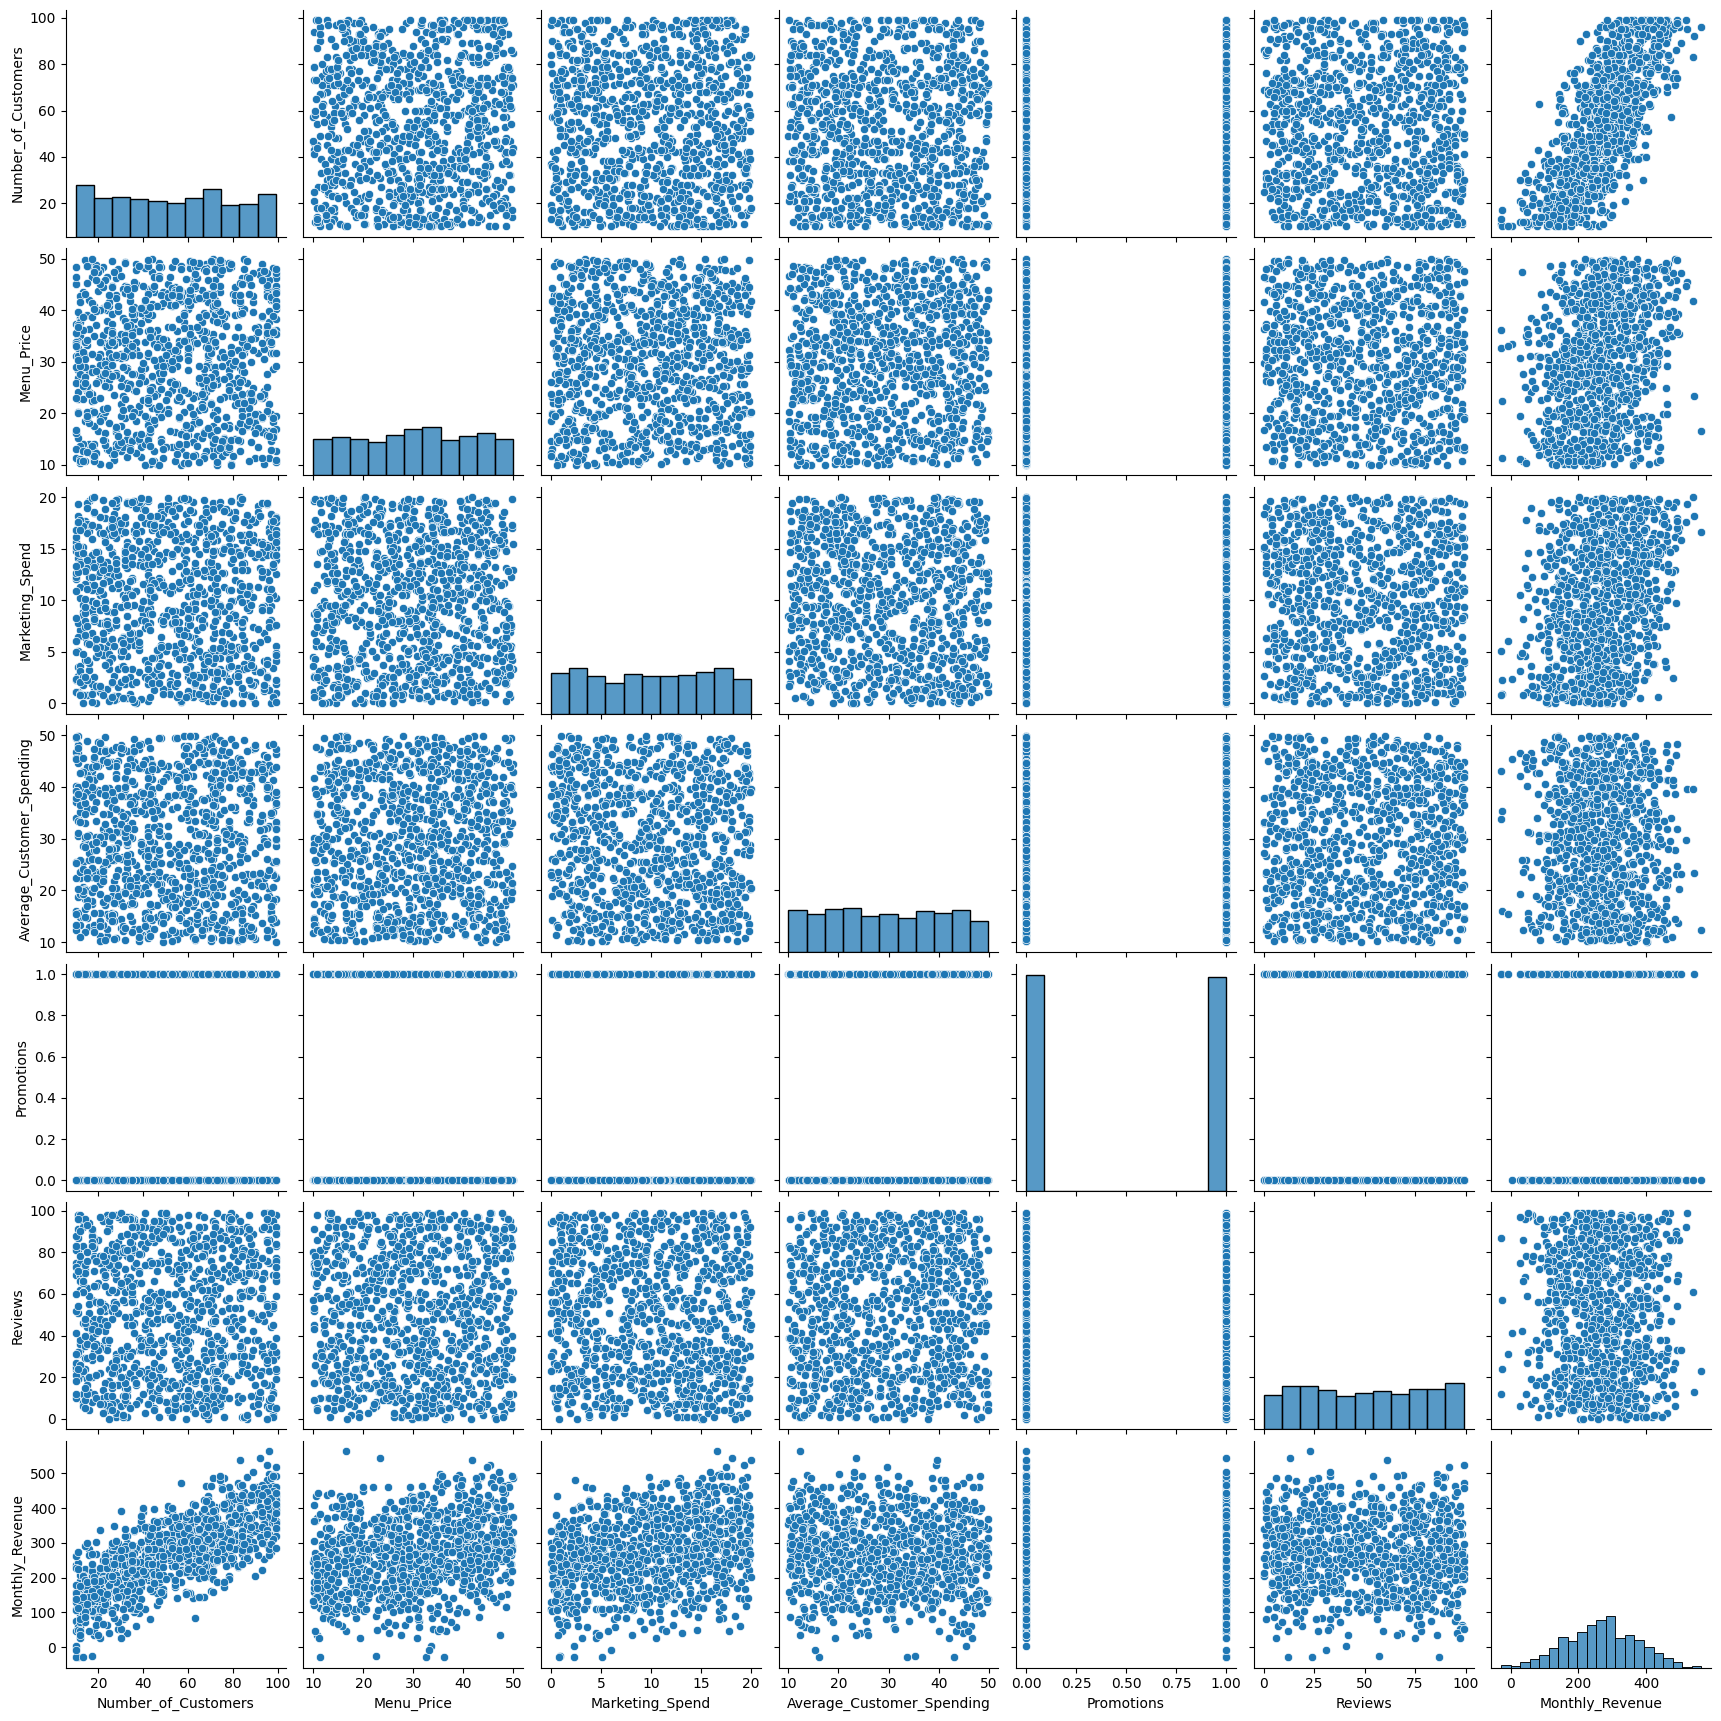

In [ ]:
sns.pairplot(revenue_dataset)
plt.show()

In [ ]:
X = revenue_dataset[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews']]
y = revenue_dataset['Monthly_Revenue']

Splitting the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using RandomForest algorithm to train the model

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest is a good choice for regression
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 4106.587902888168


Use the trained model for revenue prediction

In [ ]:
new_data = pd.DataFrame({
    'Number_of_Customers': [int(input("Enter the number of customers: "))],
    'Menu_Price': [float(input("Enter the menu price: "))],
    'Marketing_Spend': [float(input("Enter the marketing spend: "))],
    'Average_Customer_Spending': [float(input("Enter the average customer spending: "))],
    'Promotions': [int(input("Enter the number of promotions: "))],
    'Reviews': [int(input("Enter the number of reviews: "))]
})

Enter the number of customers: 100
Enter the menu price: 20
Enter the marketing spend: 5000
Enter the average customer spending: 30
Enter the number of promotions: 1
Enter the number of reviews: 4


Making a Predictive System

In [ ]:
predicted_revenue = model.predict(new_data)
print('Predicted Monthly Revenue:', predicted_revenue)

Predicted Monthly Revenue: [437.35566176]


**Strategic Actions to Maximize Business Growth Based on Predicted Revenue**

***Pricing Strategies:*** Adjust menu prices based on predicted customer spending patterns to maximize revenue.

***Marketing Optimization:*** Allocate marketing spend to channels and promotions that drive the most revenue.

***Product Offering:*** Tailor promotions and menu offerings to match customer preferences and reviews to boost sales.

# **Sales Forecasting**

Load and preprocess the dataset

In [ ]:
sales = pd.read_csv('/content/sales.csv')

Data PreProcessing

Data Cleaning

In [ ]:
#Handling Missing Values
sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#Dropping the rows with missing values
sales.dropna(inplace = True)

Exploratory Data Analysis (EDA)

In [ ]:
sales.shape

(6435, 8)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
sales.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
sales.tail()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [ ]:
sales.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

Visual Analysis

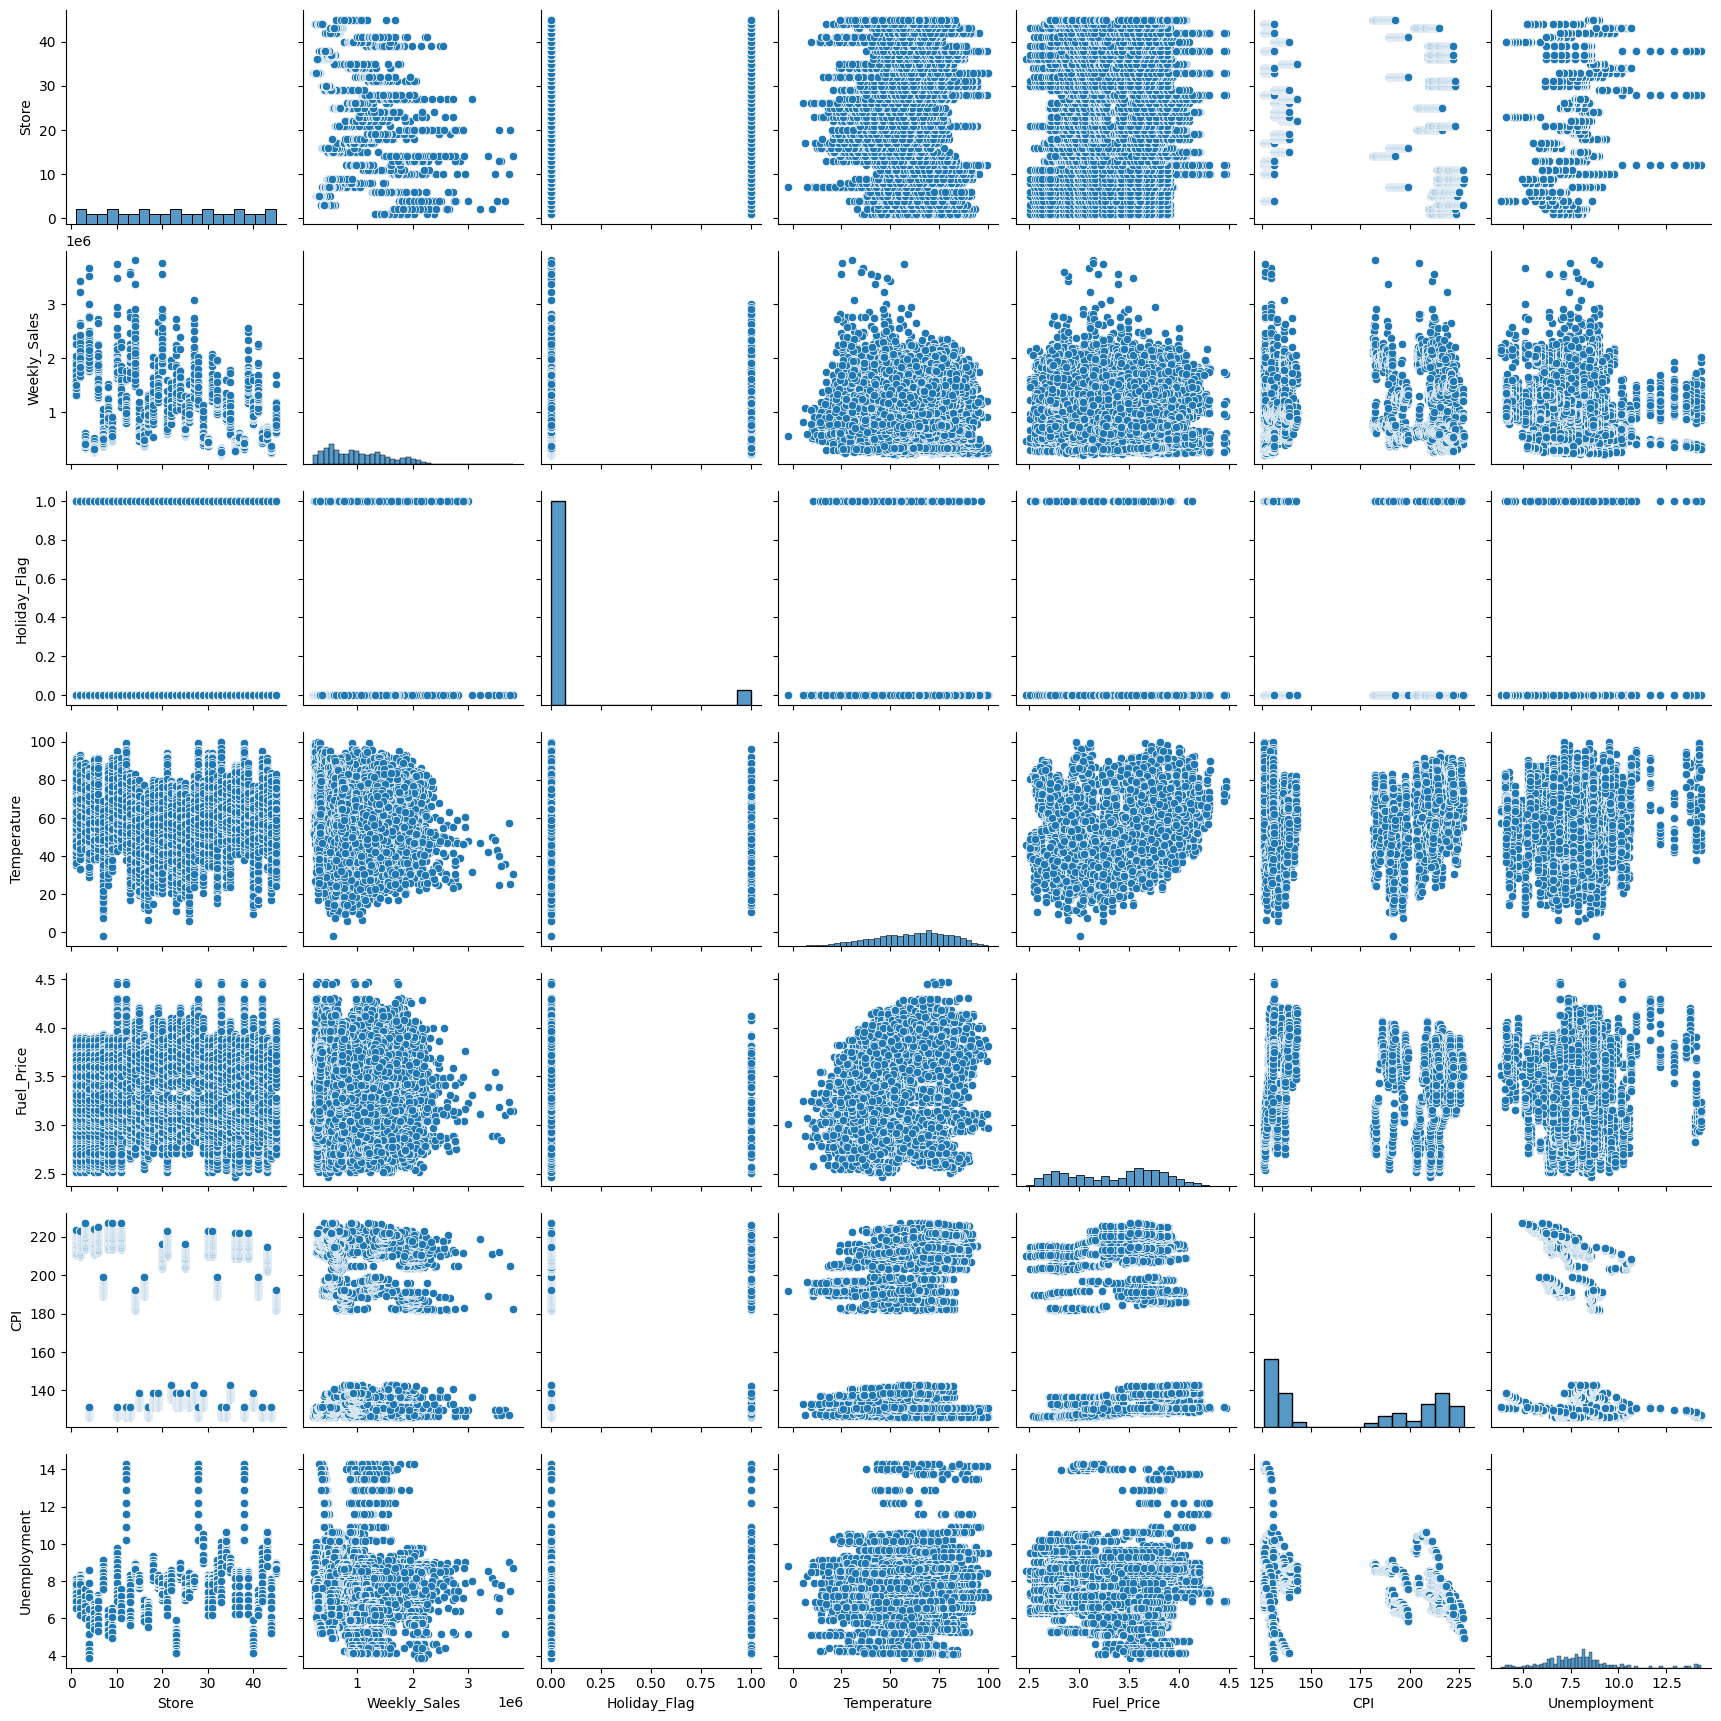

In [ ]:
sns.pairplot(sales)
plt.show()

In [ ]:
# Exclude non-numeric columns from the dataset
numeric_data = sales.select_dtypes(include=['float64', 'int64'])

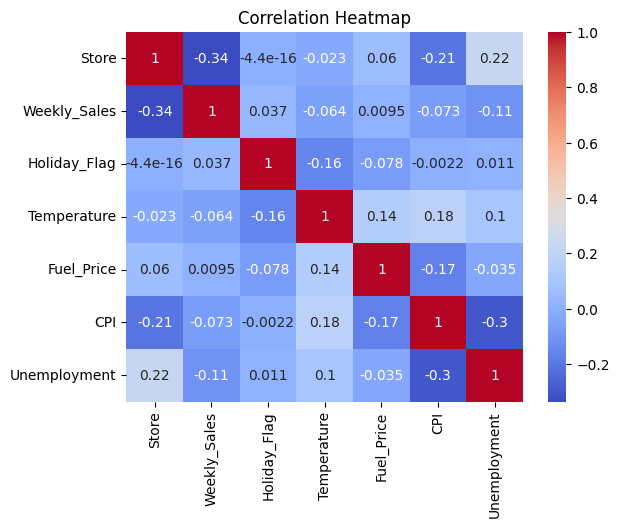

In [ ]:
# Visualize correlation heatmap
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Extract features (X) and target (y)

In [ ]:
X = sales[['Store', 'Date', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = sales['Weekly_Sales']

Convert the 'Date' column to datetime format

In [ ]:
X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')

<ipython-input-68-b531120ee0d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')


Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Choose the best algorithm and train the model

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest is a good choice for regression
model.fit(X_train.drop(columns=['Date']), y_train)  # Dropping 'Date' column as it's not needed for prediction

RandomForestRegressor(random_state=42)

Model EValuation

In [ ]:
#Mean Square Error
y_pred = model.predict(X_test.drop(columns=['Date']))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 21677879001.42671


In [ ]:
#Accuracy
accuracy = model.score(X_test.drop(columns=['Date']), y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9327096947203809


Sales Forecasting using Trained Model

In [ ]:
new_data = pd.DataFrame({
    'Store': [int(input("Enter Store no : "))],  # Example store
    'Date': [input("Enter Date : ")],  # Example date
    'Holiday_Flag': [int(input("Enter Holiday Flag : "))],
    'Temperature': [int(input("Enter Temperature : "))],
    'Fuel_Price': [int(input("Enter Fuel Price : "))],
    'CPI': [int(input("Enter Customer Price Index : "))],
    'Unemployment': [int(input('Enter Unemployment : '))]
})
#Replace the values with your own input data

Enter Store no : 1
Enter Date : 2024-03-15
Enter Holiday Flag : 0
Enter Temperature : 70
Enter Fuel Price : 3
Enter Customer Price Index : 200
Enter Unemployment : 7


Convert 'Date' column to datetime

In [ ]:
new_data['Date'] = pd.to_datetime(new_data['Date'])

Making a Predictive System

In [ ]:
predicted_weekly_sales = model.predict(new_data.drop(columns=['Date']))
print('Predicted Weekly Sales:', predicted_weekly_sales)

Predicted Weekly Sales: [1559397.4001]


**Strategic Actions to Maximize Business Growth Based on Sales Forecasting**

***Inventory Management:*** Align inventory levels with sales forecasts to prevent overstocking or stockouts.

***Staffing and Scheduling:*** Adjust staffing levels based on expected sales volumes, especially during holidays or economic fluctuations.

***Promotion Planning:*** Schedule promotions and events during periods of predicted high sales to maximize impact.

# **Customer Churn Prediction**

Load and preprocess the dataset

In [ ]:
churn = pd.read_csv('/content/churn.csv')

Data Pre Processing

Data Cleaning

In [ ]:
#Handling Missing Values
churn.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [ ]:
#Dropping rows with null values
churn.dropna(inplace = True)

Exploratory Data Analysis (EDA)

In [ ]:
churn.shape

(10000, 15)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Geography_Germany  10000 non-null  bool   
 13  Geography_Spain    10000 non-null  bool   
 14  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(9), object(1)
memory usage: 966.9+ KB


In [ ]:
churn.head(10)

RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   
5          6    15574012       Chu          645   44       8  113755.78   
6          7    15592531  Bartlett          822   50       7       0.00   
7          8    15656148    Obinna          376   29       4  115046.74   
8          9    15792365        He          501   44       4  142051.07   
9         10    15592389        H?          684   27       2  134603.88   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   
5              2          1               0        149756.71       1   
6              2          1               1         10062.80       0   
7              4          1               0        119346.88       1   
8              2          0               1         74940.50       0   
9              1          1               1         71725.73       0   

   Geography_Germany  Geography_Spain  Gender_Male  
0              False            False        False  
1              False             True        False  
2              False            False        False  
3              False            False        False  
4              False             True        False  
5              False             True         True  
6              False            False         True  
7               True            False        False  
8              False            False         True  
9              False            False         True

In [ ]:
churn.tail()

RowNumber  CustomerId    Surname  CreditScore  Age  Tenure    Balance  \
9995       9996    15606229   Obijiaku          771   39       5       0.00   
9996       9997    15569892  Johnstone          516   35      10   57369.61   
9997       9998    15584532        Liu          709   36       7       0.00   
9998       9999    15682355  Sabbatini          772   42       3   75075.31   
9999      10000    15628319     Walker          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      Geography_Germany  Geography_Spain  Gender_Male  
9995              False            False         True  
9996              False            False         True  
9997              False            False        False  
9998               True            False         True  
9999              False            False        False

In [ ]:
churn.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [ ]:
# Exclude non-numeric columns from the dataset
numeric_data = churn.select_dtypes(include=['float64', 'int64'])

Visual Analysis

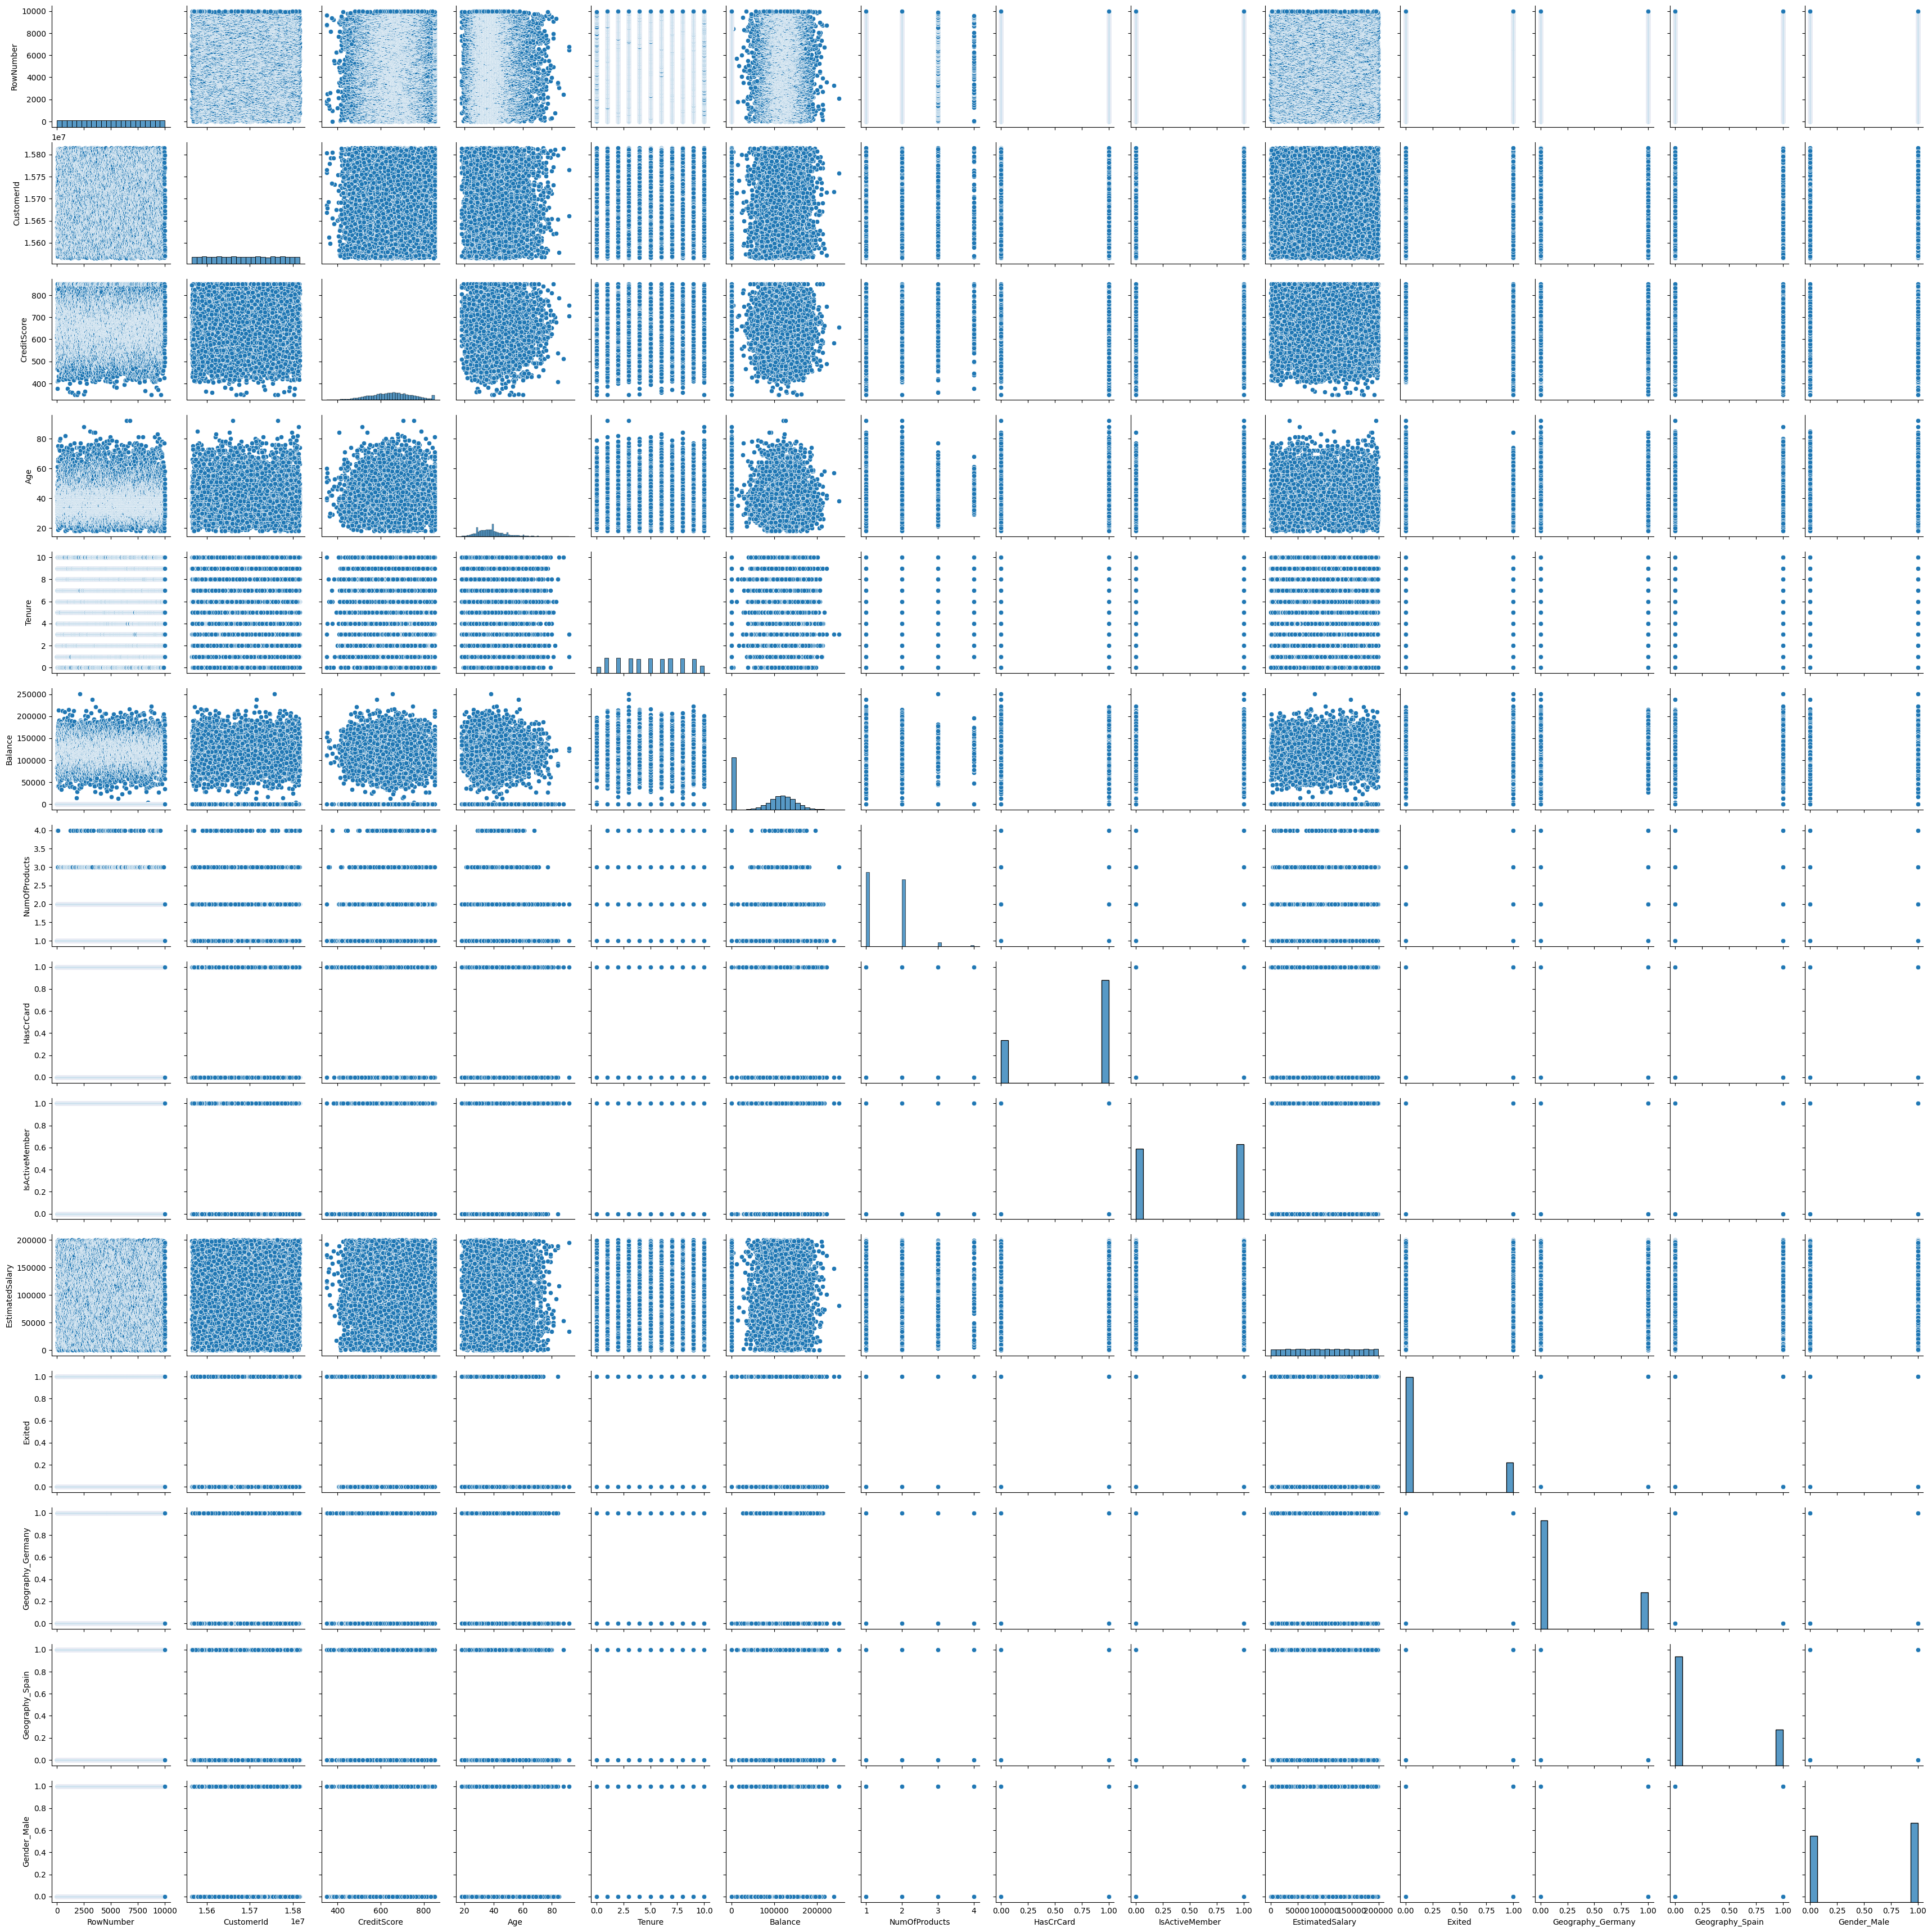

In [ ]:
sns.pairplot(churn)
plt.show()

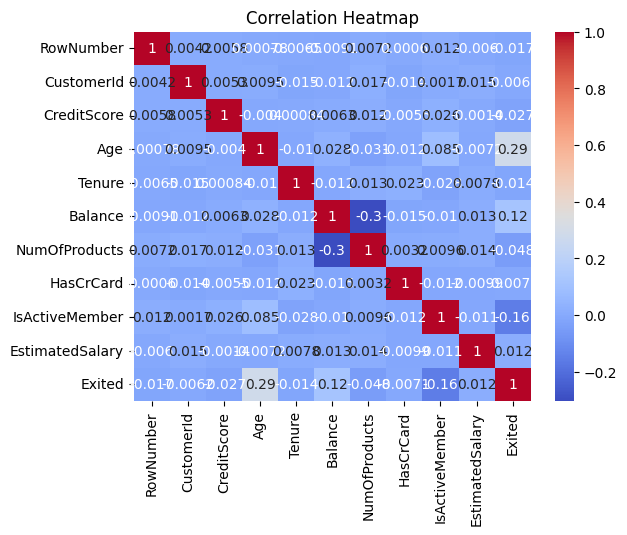

In [ ]:
#Correlation HeatMap
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Encode categorical variables

In [ ]:
churn = pd.get_dummies(churn, columns=['Geography', 'Gender'], drop_first=True)

Split the data into features (X) and target (y)

In [ ]:
X = churn.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = churn['Exited']

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using Random Forest classification algorithm to train the model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest is a good choice for classification
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Performance Evaluation

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8665
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Use the trained model for customer churn prediction

In [ ]:
new_data = pd.DataFrame({ # Replace the values with your own input data
    'CreditScore': [int(input("Enter Credit Score : "))],
    'Age': [int(input("Enter AGE : "))],
    'Tenure': [int(input("Enter Tenure : "))],
    'Balance': [int(input("Enter Balance : "))],
    'NumOfProducts': [int(input("Enter no.of Products : "))],
    'HasCrCard': [int(input("Enter 1 if you have a credit card , else enter 0 : "))],
    'IsActiveMember': [int(input("Enter 1 if you are an active member , else enter 0 : "))],
    'EstimatedSalary': [int(input("Enter Estimated salary : "))],
    'Geography_Germany': [int(input("Enter 1 if you are from Germany , else enter 0 "))],  # Example: customer is not from Germany
    'Geography_Spain': [int(input("Enter 1 if you are from Spain , else enter 0 "))],    # Example: customer is from Spain
    'Gender_Male': [int(input("Enter 1 if you are male , else enter 0 "))]         # Example: customer is male
})


Enter Credit Score : 850
Enter AGE : 70
Enter Tenure : 5
Enter Balance : 6000
Enter no.of Products : 2
Enter 1 if you have a credit card , else enter 0 : 1
Enter 1 if you are an active member , else enter 0 : 0
Enter Estimated salary : 60000
Enter 1 if you are from Germany , else enter 0 0
Enter 1 if you are from Spain , else enter 0 1
Enter 1 if you are male , else enter 0 1


Making a Predictive System

In [ ]:
predicted_churn = model.predict(new_data)     # 0 refers that the customer will stay with the company
print('Predicted Churn:', predicted_churn)    # 1 refers that the customer will leave the company

if predicted_churn == 0:
  print ("The customer will stay with the company")
if predicted_churn == 1:
  print ("The customer will leave the company")

Predicted Churn: [0]
The customer will stay with the company


**Strategic Actions to Maximize Business Growth Based On Predicted Customer Churn**

***Retention Strategies:*** Develop targeted retention campaigns for at-risk customers using personalized offers and engagement efforts.

***Customer Engagement:*** Enhance engagement with loyal customers through rewards programs and personalized communication.

***Service Improvement:*** Address common reasons for churn by improving service quality, product offerings, or customer support.

# **Pricing Optimization**

Loading and Preprocessing the Data

In [ ]:
optimize = pd.read_csv('/content/Pricing Optimization.csv.xls')

Data Cleaning

Handling Missing Values

In [ ]:
#Checking for. null values
optimize.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [ ]:
#deleting the rows with null values
optimize.dropna(inplace = True)

Exploratory Data Analysis

In [ ]:
optimize.shape

(676, 30)

In [ ]:
optimize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [ ]:
optimize.head()

product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.9  3.9  15.011897  215.000000  4.4   
1                   2  ...    89.9  3.9  14.769216  209.000000  4.4   
2                   2  ...    89.9  3.9  13.993833  205.000000  4.4   
3                   2  ...    89.9  3.9  14.656757  199.509804  4.4   
4                   2  ...    89.9  3.9  18.776522  163.398710  4.4   

         fp2  comp_3  ps3        fp3  lag_price  
0   8.760000   45.95  4.0  15.100000      45.90  
1  21.322000   45.95  4.0  12.933333      45.95  
2  22.195932   45.95  4.0  14.840000      45.95  
3  19.412885   45.95  4.0  14.287500      45.95  
4  24.324687   45.95  4.0  15.100000      45.95  

[5 rows x 30 columns]

In [ ]:
optimize.describe()

qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000000            1.000000   
50%              51.000000                  501.000000            1.500000   
75%              57.000000                  903.000000            2.000000   
max              60.000000                 3006.000000            8.000000   

       product_weight_g  product_score   customers  ...      comp_1  \
count        676.000000     676.000000  676.000000  ...  676.000000   
mean        1847.498521       4.085503   81.028107  ...   79.452054   
std         2274.808483       0.232021   62.055560  ...   47.933358   
min          100.000000       3.300000    1.000000  ...   19.900000   
25%          348.000000       3.900000   34.000000  ...   49.910000   
50%          950.000000       4.100000   62.000000  ...   69.900000   
75%         1850.000000       4.200000  116.000000  ...  104.256549   
max         9750.000000       4.500000  339.000000  ...  349.900000   

              ps1         fp1      comp_2         ps2         fp2      comp_3  \
count  676.000000  676.000000  676.000000  676.000000  676.000000  676.000000   
mean     4.159467   18.597610   92.930079    4.123521   18.620644   84.182642   
std      0.121652    9.406537   49.481269    0.207189    6.424174   47.745789   
min      3.700000    0.095439   19.900000    3.300000    4.410000   19.900000   
25%      4.100000   13.826429   53.900000    4.100000   14.485000   53.785714   
50%      4.200000   16.618984   89.990000    4.200000   16.811765   59.900000   
75%      4.200000   19.732500  117.888889    4.200000   21.665238   99.990000   
max      4.500000   57.230000  349.900000    4.400000   57.230000  255.610000   

              ps3         fp3   lag_price  
count  676.000000  676.000000  676.000000  
mean     4.002071   17.965007  107.399684  
std      0.233292    5.533256   76.974657  
min      3.500000    7.670000   19.850000  
25%      3.900000   15.042727   55.668750  
50%      4.000000   16.517110   89.900000  
75%      4.100000   19.447778  129.990000  
max      4.400000   57.230000  364.000000  

[8 rows x 27 columns]

Encoding Categorical variables

In [ ]:
label_encoder = LabelEncoder()
optimize['product_id'] = label_encoder.fit_transform(optimize['product_id'])
optimize['product_category_name'] = label_encoder.fit_transform(optimize['product_category_name'])

In [ ]:
# Splitting 'month_year' into 'month' and 'year' columns
optimize[['month', 'year']] = optimize['month_year'].str.split('-', n=1, expand=True)

In [ ]:
# Dropping 'month_year' column
optimize.drop(columns=['month_year'], inplace=True)

In [ ]:
optimize['month_year'] = optimize['month'].astype(str) + '-' + optimize['year'].astype(str)

In [ ]:
# Extracting year from 'year' column
optimize['year'] = optimize['year'].str.split('-').str[1]

# Convert 'year' to numeric
optimize['year'] = pd.to_numeric(optimize['year'])


In [ ]:
# Convert 'month' and 'year' to numeric
optimize['month'] = optimize['month'].astype(int)
optimize['year'] = optimize['year'].astype(int)

In [ ]:
# Convert 'month' and 'year' to numeric
optimize['month'] = pd.to_numeric(optimize['month'])
optimize['year'] = pd.to_numeric(optimize['year'])

Feature Selection

In [ ]:
# Selecting a subset of features
selected_features = [
    'product_id',
    'qty',
    'total_price',
    'freight_price',
    'unit_price',
    'product_photos_qty',
    'product_weight_g',
    'customers',
    'comp_1',
    'comp_2',
    'comp_3'
]

data_subset = optimize[selected_features]

Splitting the data into training and testing sets

In [ ]:
X = data_subset.drop(columns=['total_price'])  # Features
y = data_subset['total_price']  # Target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [ ]:
# Step 2: Choose the best algorithm and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest is a good choice for regression
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Perfomance Evaluation

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 147376.55605804102


Creating a new DataFrame for testing

In [ ]:
new_data = pd.DataFrame({
    'product_id': [123],
    'qty': [100],
    'freight_price': [5],
    'unit_price': [20],
    'product_photos_qty': [5],
    'product_weight_g': [500],
    'customers': [200],
    'comp_1': [18],
    'comp_2': [22],
    'comp_3': [20]
})

Making a Predictive System

In [ ]:
predicted_price = model.predict(new_data)
print('Optimized Price:', predicted_price)

Optimized Price: [4350.8562]


**Strategic Actions to Maximize Business Growth Using Optimized Pricing**

***competitive Analysis:*** Regularly review competitor pricing and adjust own prices to stay competitive while maximizing margins.

***Dynamic Pricing:*** Implement dynamic pricing strategies to adjust prices based on demand, competition, and customer behavior.

***Value Proposition:*** Highlight the unique value proposition of products to justify pricing and enhance customer perception.